In [2]:
#import the necessary libraries

import numpy as np 
import matplotlib.pyplot as plt
import json
import pandas as pd


# Load the necessary data from ../../data/bp

In [11]:
with open('../../data/bp/data_fragile.json', 'r') as fp:
    data_fragile= json.load(fp)

with open('../../data/bp/data_robust.json', 'r') as fp:
    data_robust= json.load(fp)
    

    
with open('../../data/bp/data_fragile100.json', 'r') as fp:
    data_fragile100= json.load(fp)

with open('../../data/bp/data_robust100.json', 'r') as fp:
    data_robust100= json.load(fp)
    
    
data_r = pd.read_csv("../../data/bp/bottleneck_data_rV2.csv")
data_f = pd.read_csv("../../data/bp/bottleneck_data_fV2.csv")


bottleneck_r = pd.read_csv("../../data/bp/bottleneck_r.csv")
bottleneck_f = pd.read_csv("../../data/bp/bottleneck_f.csv")

bottleneckN_f = pd.read_csv("../../data/bp/bottleneckN_0f.csv")
bottleneckN_r = pd.read_csv("../../data/bp/bottleneckN_0r.csv")

# Plotings

## 1.Single bottleneck

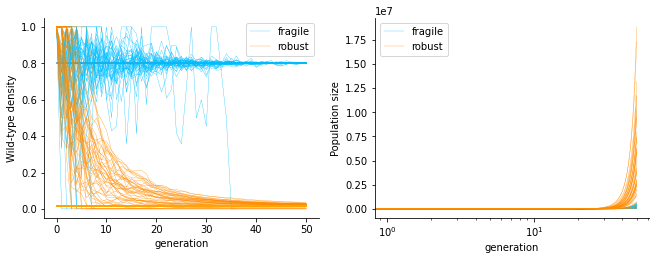

<Figure size 432x288 with 0 Axes>

In [8]:

figure = plt.figure(constrained_layout=True, figsize=(9,3.5))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.plot(np.exp(-0.2/0.9)*np.ones(51))
ax.plot(data_fragile['wtFreq'][0], color='deepskyblue', linewidth=0.3, label='fragile')
for i in range(1,50) : 
    ax.plot(data_fragile['wtFreq'][i], color='deepskyblue', linewidth=0.3)

ax.plot(data_robust['wtFreq'][0], color='darkorange', linewidth=0.3, label='robust')

for i in range(1,50) : 
    ax.plot(data_robust['wtFreq'][i], color='darkorange', linewidth=0.3)
    ax.plot(np.exp(-0.2/0.05)*np.ones(51), color='orange')
plt.ylabel('Wild-type density')
plt.xlabel('generation')
plt.legend()

ax = figure.add_subplot(gs[0,1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xscale('log')
ax.plot(data_fragile['Pop_sizes'][0], color='deepskyblue', linewidth=0.3, label='fragile')
for i in range(1,50) : 
    ax.plot(data_fragile['Pop_sizes'][i], color='deepskyblue', linewidth=0.3)

ax.plot(data_robust['Pop_sizes'][0], color='darkorange', linewidth=0.3, label='robust')
for i in range(1,50) : 
    ax.plot(data_robust['Pop_sizes'][i], color='darkorange', linewidth=0.3)
plt.ylabel('Population size')
plt.xlabel('generation')
plt.legend()
plt.show()
plt.savefig('../../images/bp/muller_ratchet_white.pdf')

## 2. Multiple bottlenecks

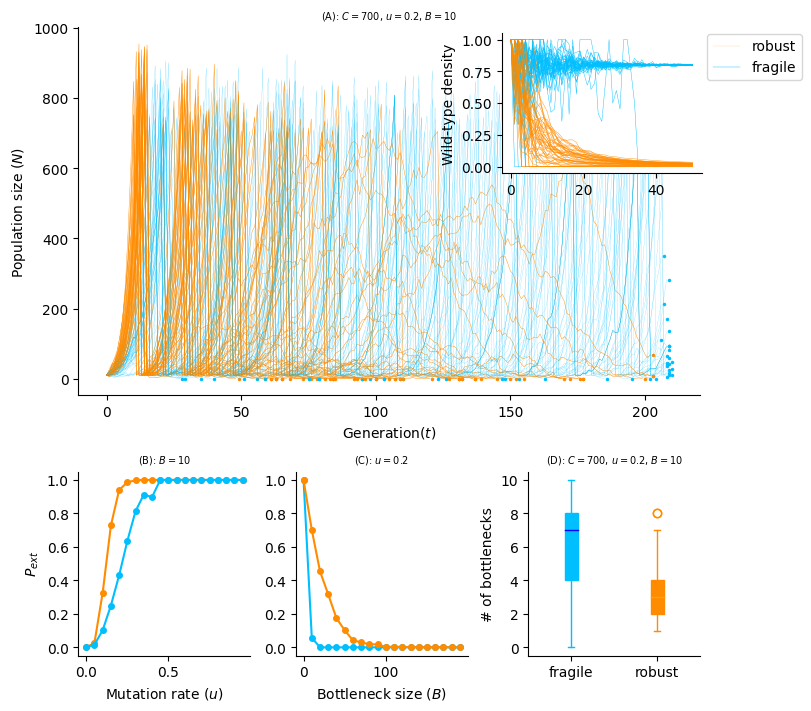

In [13]:
figure = plt.figure(constrained_layout=True, figsize=(8,7))
gs = figure.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[2, :-2])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

mut_r = [1]
mut_f = [1]
for i in np.arange(0.05, 1., 0.05) : 
    list_ = list(data_r[str(round(i,2))])
    mut_r.append(list_[10])
    
    list_ = list(data_f[str(round(i,2))])
    mut_f.append(list_[10])

ax.set_title(r"(B): $B=10$",fontsize=7)
ax.plot(np.arange(0.0, 1., 0.05),1-np.array(mut_r),'-o',ms=4., color='darkorange' ,linewidth=1.5, label='robust')
ax.plot(np.arange(0.0, 1., 0.05),1-np.array(mut_f),'-o',ms=4.,  color='deepskyblue', linewidth=1.5, label='fragile')
plt.xlabel(r'Mutation rate ($u$)')
plt.ylabel(r'$P_{ext}$')
#plt.legend()
ax = figure.add_subplot(gs[2, 1:2])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.xlabel(r'Bottleneck size ($B$)')
plt.title(r'(C): $u=0.2$',fontsize=7)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.plot(np.arange(0,5010,step=10)[:20],1-np.array([0]+list(bottleneckN_f["fragile"])[1:20]),'o-',ms=4.,color="deepskyblue" ,label="Fragile",linewidth=1.5)
ax.plot(np.arange(0,5010,step=10)[:20],1-np.array([0]+list(bottleneckN_r["robust"])[1:20]), 'o-',ms=4.,color='darkorange', label="Robust", linewidth=1.5)

#plt.legend()

ax = figure.add_subplot(gs[2, 2:])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.ylabel("# of bottlenecks")
plt.title(r'(D): $C=700$, $u=0.2$, $B=10$',fontsize=7)

ax.boxplot([data_fragile100['number_of_bn']],positions=[1.5], labels=["fragile"],
           patch_artist=True,boxprops=dict(facecolor='deepskyblue', color='deepskyblue'),medianprops=dict(color="blue")
          ,capprops=dict(color="deepskyblue"),whiskerprops=dict(color='deepskyblue'),flierprops=dict(color='deepskyblue', markeredgecolor="deepskyblue"))
ax.boxplot([data_robust100['number_of_bn']], positions=[2.5], labels=["robust"],
           patch_artist=True,boxprops=dict(facecolor='darkorange',color='darkorange'),medianprops=dict(color="orange")
          ,capprops=dict(color="darkorange"),whiskerprops=dict(color='darkorange'),flierprops=dict(color='darkorange', markeredgecolor="darkorange"))
ax =figure.add_subplot(gs[0:2, :])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylabel('Population size ($N$)')
plt.xlabel('Generation($t$)')
ax.set_title(r'(A): $C=700$, $u=0.2$, $B=10$',fontsize=7)
#plt.ylim((0,700.))
plt.style.use('default')
for i in range(50): 
    if i == 1 : 
        plt.plot(data_fragile100['Pop_sizes'][i],color='darkorange', linewidth=0.1, label='robust')
        plt.plot(len(data_robust100['Pop_sizes'][i]),data_robust100['Pop_sizes'][i][-1],'-o', ms=1.5,color='darkorange')
        plt.plot(data_fragile100['Pop_sizes'][i], color="deepskyblue",linewidth=0.3, label='fragile')
        plt.plot(len(data_fragile100['Pop_sizes'][i]),data_fragile100['Pop_sizes'][i][-1],'-o', ms=1.5,color='deepskyblue')
    plt.plot(data_robust100['Pop_sizes'][i],color='darkorange', linewidth=0.3)
    plt.plot(len(data_robust100['Pop_sizes'][i]),data_robust100['Pop_sizes'][i][-1],'-o', ms=1.5,color='darkorange')
    plt.plot(data_fragile100['Pop_sizes'][i], color="deepskyblue",linewidth=0.1) 
    plt.plot(len(data_fragile100['Pop_sizes'][i]),data_fragile100['Pop_sizes'][i][-1],'-o', ms=1.5,color='deepskyblue')

plt.legend(bbox_to_anchor=(1., 1.0))
ax2 = plt.axes([0.62, 0.76, 0.25, 0.2])
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
for i in range(1,50) : 
    ax2.plot(data_fragile['wtFreq'][i], color='deepskyblue', linewidth=0.3)

for i in range(1,50) : 
    ax2.plot(data_robust['wtFreq'][i], color='darkorange', linewidth=0.3)
    #ax.plot(np.exp(-0.2/0.05)*np.ones(51), color='orange')
plt.ylabel('Wild-type density')
#plt.xlabel('generation')
plt.savefig("../../images/bp/multi_bottleneckBP.pdf")
plt.show()